<a href="https://colab.research.google.com/github/els326/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. Load the datasets:

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_shelter = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD')

Step 2. Filter the shelter count dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'

In [4]:
df_shelter.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [26]:
df_shelter = df_shelter[df_shelter['Report Date']=='09/30/2019']
df_shelter.drop_duplicates()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,shelter_sum
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0,8.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0,32.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0,21.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0,26.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0,13.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0,8.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0


In [28]:
df_shelter.groupby('Report Date').size()

Report Date
09/30/2019    64
dtype: int64

Step 3. Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

In [29]:
df_shelter.fillna(0)
df_shelter['shelter_sum'] = df_shelter.loc[:,'Adult Family Comm Hotel':'FWC Shelter'].sum(axis=1)
df_shelter.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,shelter_sum
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0,8.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0,32.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0,21.0


Step 4. From the 311 dataset, create a subset of all the 311 requests where complaint_type == 'Homeless Person Assistance'

In [21]:
df = df[df['complaint_type']=='Homeless Person Assistance']
df.groupby('complaint_type').size()

complaint_type
Homeless Person Assistance    16513
dtype: int64

Step 5. Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district

In [24]:
df_hpa = df.groupby('borocd').size().nlargest().reset_index(name='count_of_311_requests')
print(df_hpa)

   borocd  count_of_311_requests
0   105.0                   3020
1   107.0                   1684
2   104.0                   1055
3   102.0                    965
4   101.0                    758


Step 6. Merge the homeless 311 request count table (from Step 5) with the shelter count table (from Step 3).

Tip: Not all community districts have homeless facilities in them. Use a left join with the 311 complaints as the left table and shelter counts as the right table. After doing this, you should fill in the new NaNs with zeros using the .fillna(0) method on your dataframe.


In [35]:
merged_df = pd.merge(left=df_hpa, right=df_shelter, left_on='borocd', right_on='Community District')
merged_df.fillna(0)
merged_df.head()

,borocd,count_of_311_requests,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,shelter_sum
0,105.0,3020,09/30/2019,Manhattan,105,NaN,1.0,NaN,NaN,NaN,8.0,1.0,10.0
1,107.0,1684,09/30/2019,Manhattan,107,NaN,1.0,3.0,NaN,NaN,NaN,3.0,7.0
2,104.0,1055,09/30/2019,Manhattan,104,NaN,1.0,3.0,NaN,NaN,4.0,NaN,8.0
3,101.0,758,09/30/2019,Manhattan,101,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0


Step 7. Produce a scatter plot of the data using the matplotlib package. What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests?

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

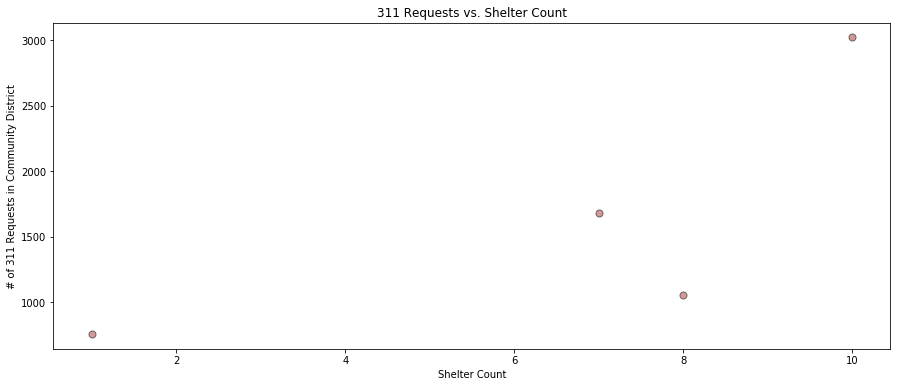

In [33]:
x = np.array(merged_df['shelter_sum'])
y = np.array(merged_df['count_of_311_requests'])

color = '#a83232' 
area = 50 

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 

plt.title('311 Requests vs. Shelter Count')
plt.xlabel('Shelter Count')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

There seems to be a positive relationship between shelter count and 311 requests for homeless person assistance. As shelter count increases, 311 requests for homeless person assistance increase. 

Step 8. Use np.corrcoef(x, y) to identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.

In [36]:
x = np.array(merged_df['shelter_sum'])
y = np.array(merged_df['count_of_311_requests'])

np.corrcoef(x, y)

array([[1.        , 0.75630499],
       [0.75630499, 1.        ]])

Step 9. Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable

In [0]:
import statsmodels.api as sm

In [38]:
y = np.array(merged_df['count_of_311_requests'])
x = np.array(merged_df['shelter_sum'])
x = sm.add_constant(x)
print(x)
model = sm.OLS(y,x).fit()
print(model.summary())

[[ 1. 10.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  1.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     2.673
Date:                Mon, 02 Dec 2019   Prob (F-statistic):              0.244
Time:                        15:14:50   Log-Likelihood:                -31.051
No. Observations:                   4   AIC:                             66.10
Df Residuals:                       2   BIC:                             64.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Step 10. Produce a scatter plot of the data with the line of best fit from your linear regression using the matplotlib package

In [39]:
p = model.params 
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [354.45555556 196.12222222]
R2: 0.5719972436500097


In [40]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = 196.12x + 354.46; R2 = 0.572


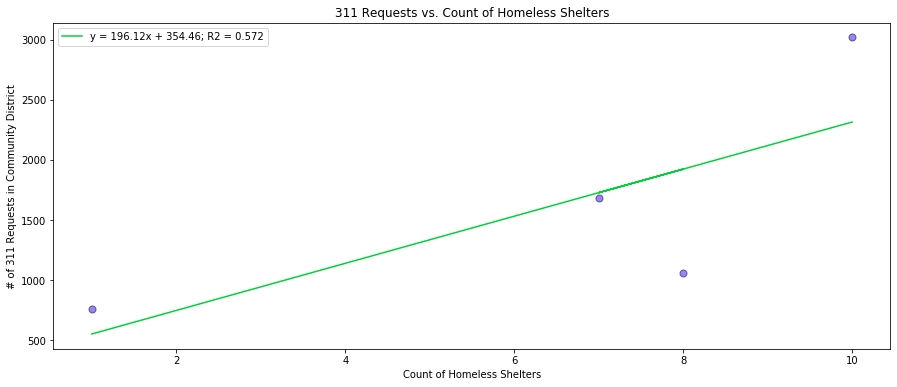

In [41]:
x_dummy = np.array(merged_df['shelter_sum'])

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_df['shelter_sum']), 
    np.array(merged_df['count_of_311_requests']), 
    s=50, 
    c='#3d03fc',
    edgecolors='black', 
    alpha=0.5) 

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138',
    label=label)

plt.title('311 Requests vs. Count of Homeless Shelters')
plt.xlabel('Count of Homeless Shelters')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()

plt.show()

Step 11: Write a sentence or two explaining the results of your analysis. What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?

The R squared is .572, which tells us that 57.2% of the variation in 311 requests for homeless person assistance is explained by the number of homeless shelters in the community district. We know from the correlation coefficient that there is a positive relationship between the two, because 311 requests for homeless person assistance increase as number of shelters increase.